<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/1-Introduction%20to%20Tensorflow/3-Week%203/1_Validation_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VALIDATION SETS

Import Libraries

In [8]:
import tensorflow as tf
print(tf.__version__)

2.9.2


Load the Data - Diabetes

In [9]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

look the Keys of the dataset

In [10]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


Now we will load the data and the target

In [11]:
data = diabetes_dataset["data"]
target = diabetes_dataset["target"]

Look up the target array and see if is neccesarry normalize

In [12]:
print(target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

Normalize the target

In [13]:
target = (target-target.mean())/target.std()
print(target)

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.18346343e+00 -1.05621

Split train and test sets using sklearn package

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data,train_targets, test_targets = train_test_split(data, target,test_size=0.1)

# look the shape of the train and test
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


**TRAIN THE FEEDFORWARD NEURAL NETWORK MODEL**

In [17]:
# Create the model

def get_model():
  Sequential = tf.keras.models.Sequential
  Dense = tf.keras.layers.Dense

  model = Sequential([
      Dense(128,activation="relu", input_shape=(train_data.shape[1],)),
      Dense(128,activation="relu"),
      Dense(128,activation="relu"),
      Dense(128,activation="relu"),
      Dense(128,activation="relu"),
      Dense(128,activation="relu"),
      Dense(1)
  ])
  return model

model=get_model()

Print the summary model

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                

Compile the model

In [19]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

Train the model, with the data for the train your fit 

In [20]:
history = model.fit(train_data,train_targets, epochs=100,validation_split=0.15,batch_size=64)

Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 0.9989 - mae: 0.8692 - val_loss: 0.8865 - val_mae: 0.7756
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9031 - mae: 0.8256 - val_loss: 0.7623 - val_mae: 0.7267
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6973 - mae: 0.7186 - val_loss: 0.6098 - val_mae: 0.6310
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5339 - mae: 0.5819 - val_loss: 0.6283 - val_mae: 0.6341
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4834 - mae: 0.5452 - val_loss: 0.6518 - val_mae: 0.6768
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4719 - mae: 0.5547 - val_loss: 0.6249 - val_mae: 0.6554
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4639 - mae: 0.5441 - val_loss: 0.5848 - val_mae: 0.5972
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4534 - mae: 0.5267

Evaluate the model on the test set

In [21]:
model.evaluate(test_data,test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 0.6823 - mae: 0.6344


[0.6822894811630249, 0.6343873143196106]

**PLOT THE LEARNING CURVES**

import libraries

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

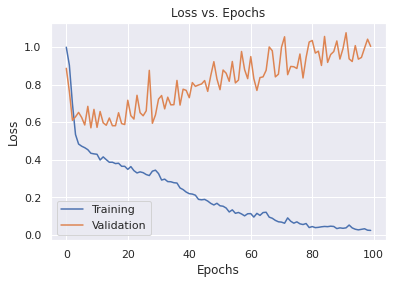

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss vs. Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"],loc="best")
plt.show()

**ANALYZE**


We can observe that exist an overfitting in the trainning of the model.